# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


# Loop through all the cities in the city list
for city in cities:
        

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f'{url}&q={city}').json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =   city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
       



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | san clemente del tuyu
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | holualoa
Processing Record 9 of Set 1 | fort bragg
Processing Record 10 of Set 1 | aykhal
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | nema
Processing Record 13 of Set 1 | harstad
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | ghadamis
Processing Record 16 of Set 1 | port saint john's
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | keflavik
Processing Record 22 of Set 1 | p

In [4]:
print(city_data)

[{'City': 'adamstown', 'Lat': -25.066, 'Lng': -130.1015, 'Max Temp': 20.89, 'Humidity': 82, 'Cloudiness': 85, 'Wind Speed': 10.47, 'Country': 'PN', 'Date': 1692036592}, {'City': 'lebu', 'Lat': -37.6167, 'Lng': -73.65, 'Max Temp': 13.38, 'Humidity': 78, 'Cloudiness': 100, 'Wind Speed': 2.96, 'Country': 'CL', 'Date': 1692036592}, {'City': 'bredasdorp', 'Lat': -34.5322, 'Lng': 20.0403, 'Max Temp': 8.41, 'Humidity': 83, 'Cloudiness': 37, 'Wind Speed': 2.02, 'Country': 'ZA', 'Date': 1692036593}, {'City': 'san clemente del tuyu', 'Lat': -36.3569, 'Lng': -56.7235, 'Max Temp': 19.99, 'Humidity': 55, 'Cloudiness': 4, 'Wind Speed': 6.24, 'Country': 'AR', 'Date': 1692036593}, {'City': 'blackmans bay', 'Lat': -43.0167, 'Lng': 147.3167, 'Max Temp': 2.51, 'Humidity': 91, 'Cloudiness': 19, 'Wind Speed': 1.79, 'Country': 'AU', 'Date': 1692036593}, {'City': 'olonkinbyen', 'Lat': 70.9221, 'Lng': -8.7187, 'Max Temp': 5.86, 'Humidity': 88, 'Cloudiness': 21, 'Wind Speed': 5.47, 'Country': 'SJ', 'Date': 169

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data = pd.DataFrame(city_data)

# Show Record Count
city_data.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.89,82,85,10.47,PN,1692036592
1,lebu,-37.6167,-73.6500,13.38,78,100,2.96,CL,1692036592
2,bredasdorp,-34.5322,20.0403,8.41,83,37,2.02,ZA,1692036593
3,san clemente del tuyu,-36.3569,-56.7235,19.99,55,4,6.24,AR,1692036593
4,blackmans bay,-43.0167,147.3167,2.51,91,19,1.79,AU,1692036593


In [7]:
# Export the City_Data into a csv
city_data.to_csv("/Users/greener/Desktop/Homework/06-APIs/WeatherPy/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data = pd.read_csv("/Users/greener/Desktop/Homework/06-APIs/WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.89,82,85,10.47,PN,1692036592
1,lebu,-37.6167,-73.6500,13.38,78,100,2.96,CL,1692036592
2,bredasdorp,-34.5322,20.0403,8.41,83,37,2.02,ZA,1692036593
3,san clemente del tuyu,-36.3569,-56.7235,19.99,55,4,6.24,AR,1692036593
4,blackmans bay,-43.0167,147.3167,2.51,91,19,1.79,AU,1692036593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

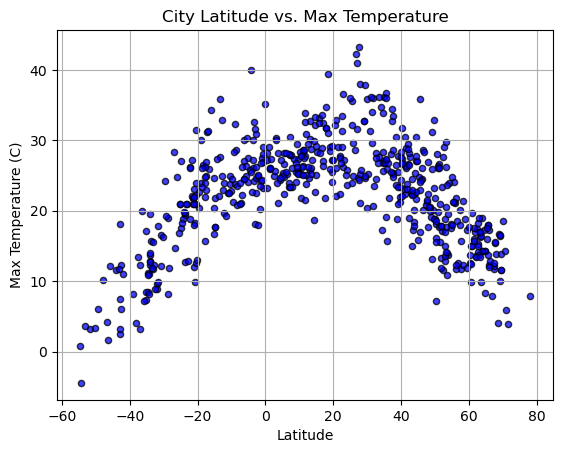

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data['Lat'], city_data['Max Temp'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/greener/Desktop/Homework/06-APIs/WeatherPy/Output Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

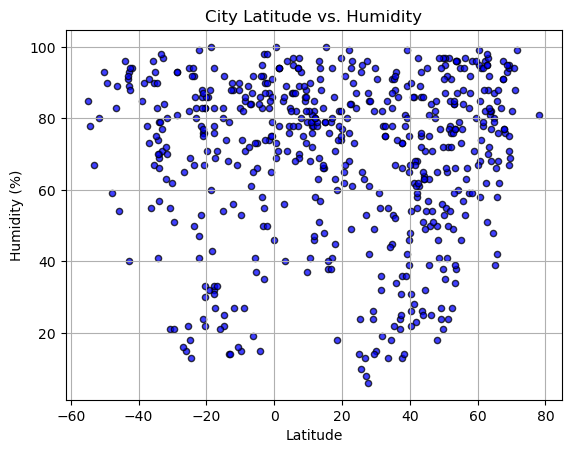

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data['Lat'], city_data['Humidity'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/greener/Desktop/Homework/06-APIs/WeatherPy/Output Data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

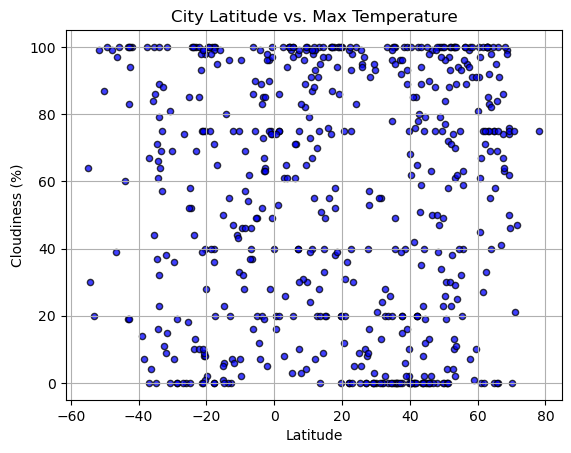

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data['Lat'], city_data['Cloudiness'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/greener/Desktop/Homework/06-APIs/WeatherPy/Output Data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

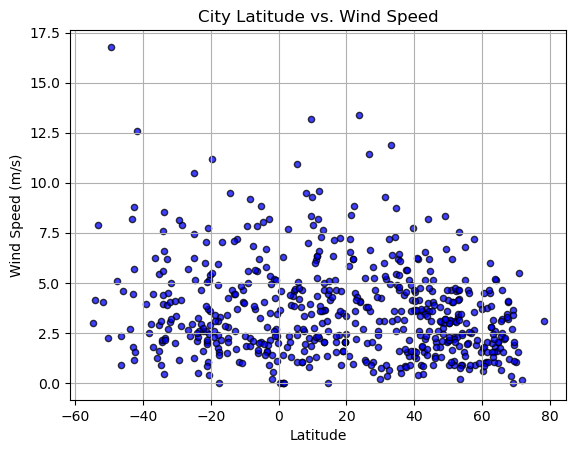

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data['Lat'], city_data['Wind Speed'], marker='o', s=20, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("/Users/greener/Desktop/Homework/06-APIs/WeatherPy/Output Data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data.loc[(city_data["Lat"] >= 0)]

# Display sample data
northern_hemi.reset_index().head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,5,olonkinbyen,70.9221,-8.7187,5.86,88,21,5.47,SJ,1692036593
1,7,holualoa,19.6228,-155.9522,27.15,74,20,2.06,US,1692036594
2,8,fort bragg,35.1390,-79.0060,36.13,53,100,6.17,US,1692036594
3,9,aykhal,66.0000,111.5000,12.37,68,100,3.21,RU,1692036594
4,10,dudinka,69.4058,86.1778,11.58,67,62,1.87,RU,1692036594


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data.loc[(city_data["Lat"] <0)]

# Display sample data
southern_hemi.reset_index().head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,adamstown,-25.0660,-130.1015,20.89,82,85,10.47,PN,1692036592
1,1,lebu,-37.6167,-73.6500,13.38,78,100,2.96,CL,1692036592
2,2,bredasdorp,-34.5322,20.0403,8.41,83,37,2.02,ZA,1692036593
3,3,san clemente del tuyu,-36.3569,-56.7235,19.99,55,4,6.24,AR,1692036593
4,4,blackmans bay,-43.0167,147.3167,2.51,91,19,1.79,AU,1692036593


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.43195888124800585


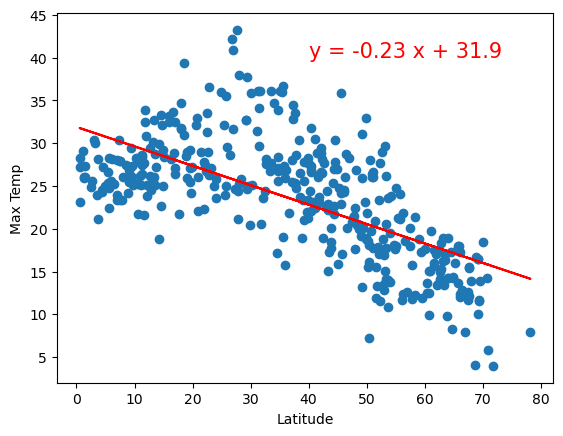

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (40,40))


The r-value is: 0.6521913808496026


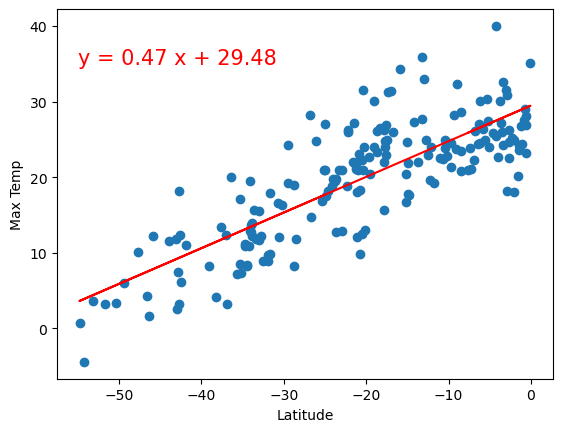

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-55,35))

**Discussion about the linear relationship:** The r values in both scatter plots are around 0.5 (+/-) suggesting that there is a moderate positve correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 5.524419042059513e-07


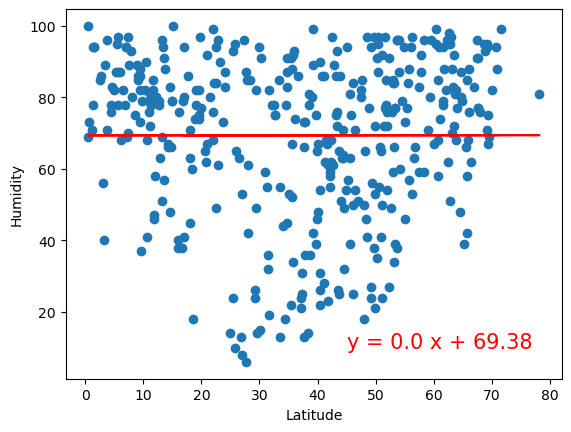

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (45,10))

The r-value is: 0.014889089118755075


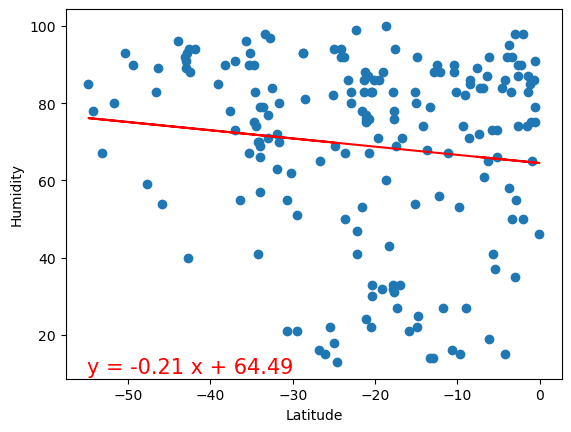

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-55,10))

**Discussion about the linear relationship:** The low r values indicate that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0003269125517392437


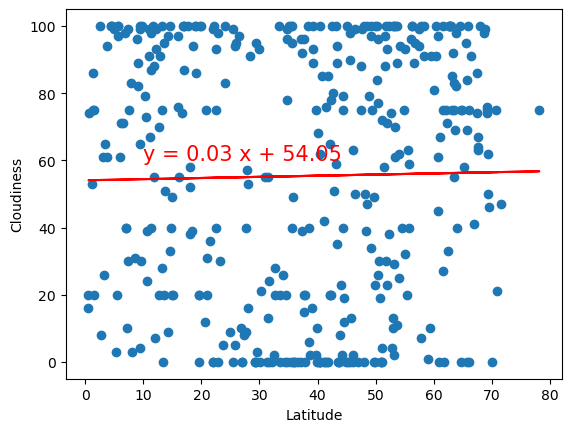

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (10,60))

The r-value is: 0.001244119677211058


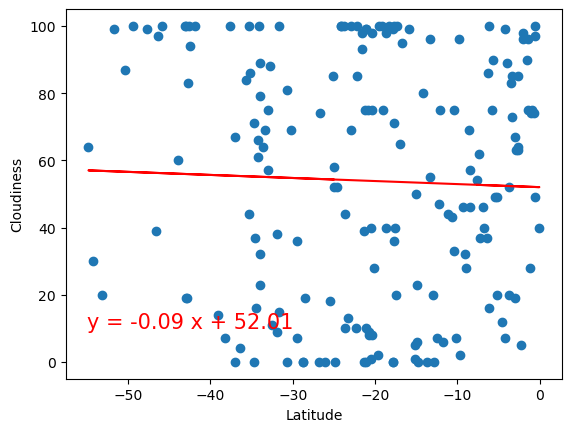

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-55,10))

**Discussion about the linear relationship:** The low r values indicate that there is no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05480992177652462


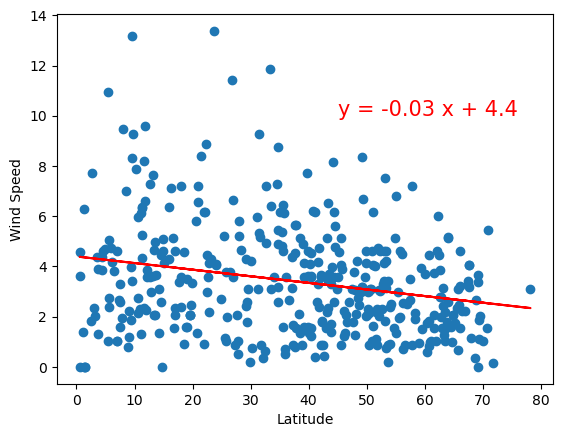

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (45,10))

The r-value is: 0.01522877830162384


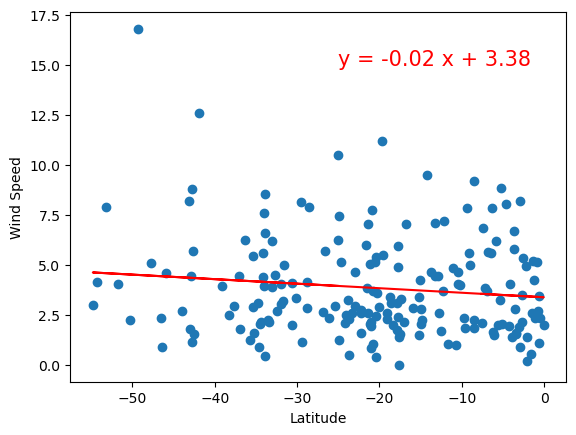

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi["Lat"]
y_values = southern_hemi["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-25,15))

**Discussion about the linear relationship:** The low r values indicate that there is no correlation between latitude and wind speed.